# Connectivity

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [6]:
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [7]:
sns.set_context("notebook", rc={"legend.fontsize":15, "legend.title_fontsize":20, 
                                "axes.titlesize":22,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

In [8]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/real/topk/config_real_topk_5expe.json'
ranges = get_param_ranges(jsonpath)

df_real = pd.read_csv(os.path.join(dir, f'nc_real_topk_5expe.csv'), index_col = 0)

In [16]:
agg_real = df_real.groupby(["explainer_name", "topk"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_real = agg_real[["explainer_name", "topk", "cc_ratio"]]
res_real[res_real.topk==10].sort_values(by=['cc_ratio'], ascending=True)

,explainer_name,topk,cc_ratio
10,distance,10.0,0.125518
42,occlusion,10.0,0.173653
18,gnnexplainer,10.0,0.197249
50,pagerank,10.0,0.205136
26,gradcam,10.0,0.213670
34,ig,10.0,0.278791
82,sa,10.0,0.279779
2,basic_gnnexplainer,10.0,0.396981
74,random,10.0,0.525854
66,pgmexplainer,10.0,0.549476


In [27]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_5expe.json'
ranges = get_param_ranges(jsonpath)

df_syn = pd.read_csv(os.path.join(dir, f'nc_syn_topk_5expe.csv'), index_col = 0)

In [8]:
agg_syn = df_syn.groupby(["explainer_name", "topk"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_syn = agg_syn[["explainer_name", "topk", "cc_ratio"]]
res_syn[res_syn.topk==10].sort_values(by=['cc_ratio'], ascending=True)

,explainer_name,topk,cc_ratio
10,distance,10.0,0.135032
42,pagerank,10.0,0.178597
26,ig,10.0,0.217308
82,subgraphx,10.0,0.227850
74,sa,10.0,0.229517
18,gnnexplainer,10.0,0.231542
2,basic_gnnexplainer,10.0,0.233182
58,pgmexplainer,10.0,0.236587
34,occlusion,10.0,0.236798
50,pgexplainer,10.0,0.439070


In [32]:
agg_syn = df_syn.groupby(["explainer_name", "topk"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_syn = agg_syn[["explainer_name", "topk", "cc_ratio"]]
res_syn_15 = res_syn[res_syn.topk==15]
syn_15 = pd.pivot_table(res_syn_15, values='cc_ratio', index=['explainer_name'])
syn_15

,cc_ratio
explainer_name,
basic_gnnexplainer,0.176403
distance,0.100210
gnnexplainer,0.175737
ig,0.180424
occlusion,0.206097
pagerank,0.127548
pgexplainer,0.439958
pgmexplainer,0.173733
random,0.485957


In [19]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_top_edges.json'
ranges = get_param_ranges(jsonpath)

df_top = pd.read_csv(os.path.join(dir, f'nc_syn_top_edges.csv'), index_col = 0)

In [20]:
agg_top = df_top.groupby(["dataset", "explainer_name"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_top = agg_top[["dataset", "explainer_name", "f1_score"]]
res_top.sort_values(by=['dataset','f1_score'], ascending=[True, False])

,dataset,explainer_name,f1_score
5,syn1,pagerank,0.861667
1,syn1,distance,0.678455
10,syn1,subgraphx,0.612544
7,syn1,pgmexplainer,0.543333
3,syn1,ig,0.446576
0,syn1,basic_gnnexplainer,0.309697
2,syn1,gnnexplainer,0.297576
4,syn1,occlusion,0.171667
9,syn1,sa,0.043333
6,syn1,pgexplainer,0.017000


In [26]:
top_acc = pd.pivot_table(df_top, values='f1_score', index=['explainer_name'], columns='dataset')
top_acc

dataset,syn1,syn3,syn4,syn5,syn6
explainer_name,,,,,
basic_gnnexplainer,0.309697,0.663819,0.233333,0.327812,0.126889
distance,0.678455,0.730820,0.250758,0.385389,0.733333
gnnexplainer,0.297576,0.660332,0.239333,0.349876,0.172222
ig,0.446576,0.185991,0.244303,0.435313,0.399778
occlusion,0.171667,0.000000,0.220000,0.268015,0.074000
pagerank,0.861667,0.937879,0.323333,0.485000,0.658222
pgexplainer,0.017000,0.011087,0.000000,0.000000,0.012444
pgmexplainer,0.543333,0.663484,0.350121,0.473294,0.394444
random,0.005000,0.006667,0.003333,0.000833,0.000000


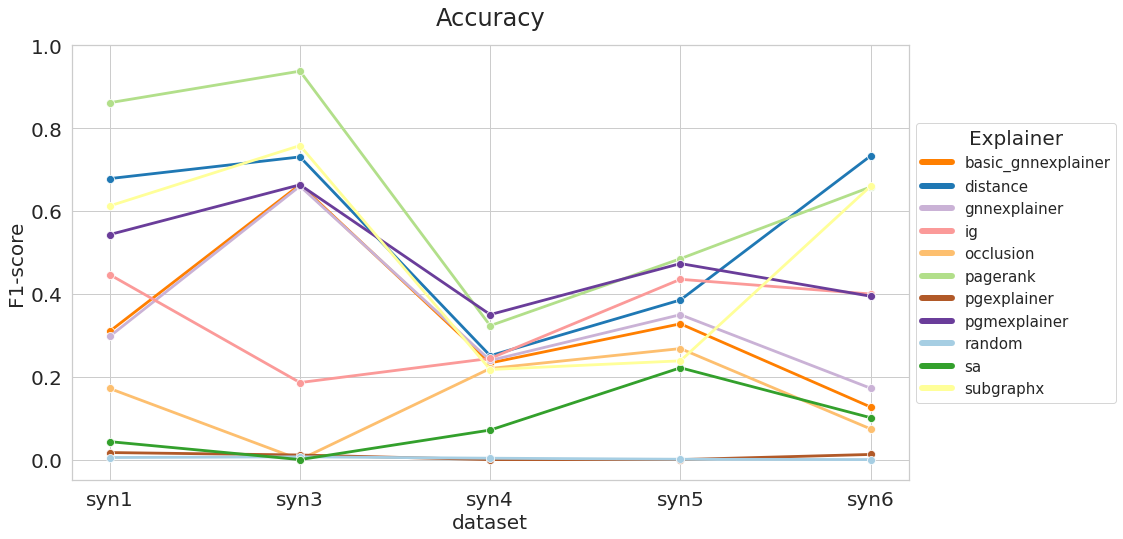

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_top, x="dataset", y='f1_score',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax, linewidth=2.8, markersize=8)

plt.title('Accuracy', fontsize=24, pad=20)
# Put the legend out of the figure
leg = g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")
for i in range(11):
    leg.get_lines()[i].set_linewidth(6)
plt.subplots_adjust(hspace = 0.8)
plt.ylim(-0.05,1)
#plt.xlabel("dataset")
plt.ylabel("F1-score")
plt.show()